In [34]:
import os
from os import listdir

In [35]:
train_data=r'C:\Users\Hp\Clothes\Train'
test_data=r'C:\Users\Hp\Clothes\Test'

# Displaying The images......

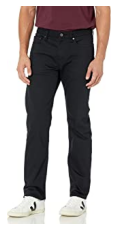

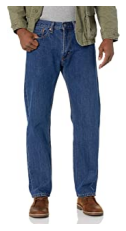

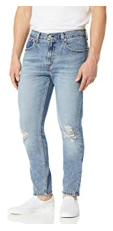

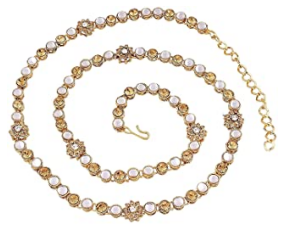

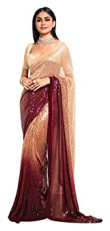

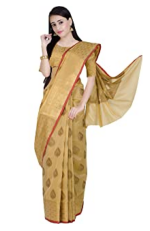

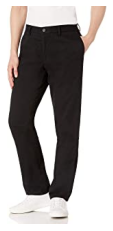

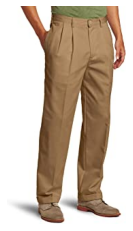

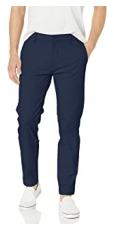

In [36]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_jeans=r'C:\Users\Hp\Clothes\Train\Men_Jeans_Images'
train_saree=r'C:\Users\Hp\Clothes\Train\Sarees_Images'
train_trouser=r'C:\Users\Hp\Clothes\Train\Men_Trousers_Images'


Cloth_train=[train_jeans, train_saree, train_trouser]
for dirs in Cloth_train:
    k=listdir(dirs)
    for i in k[:3]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [37]:
file1 = os.listdir(r'C:\Users\Hp\Clothes\Train')
file1

['Men_Jeans_Images', 'Men_Trousers_Images', 'Sarees_Images']

In [38]:
file2 = os.listdir(r'C:\Users\Hp\Clothes\Test')
file2

['Men_Jeans_Images', 'Men_Trousers_Images', 'Sarees_Images']

Checking the Count of images in each folder

In [39]:
print("Count of Training Images")
print("No.of Images of Sarees in train dataset -> ",len(os.listdir(r'C:\Users\Hp\Clothes\Train\Sarees_Images')))
print("No.of Images of Men Jeans in train dataset -> ",len(os.listdir(r'C:\Users\Hp\Clothes\Train\Men_Jeans_Images')))
print("No.of Images of Men Trousers in train dataset ->",len(os.listdir(r'C:\Users\Hp\Clothes\Train\Men_Trousers_Images')))
"\n"

print("Count of Test Images")
print("No.of Images of Sarees in test dataset-> ",len(os.listdir(r'C:\Users\Hp\Clothes\Test\Sarees_Images')))
print("No.of Images of Men Jeans in test dataset ->",len(os.listdir(r'C:\Users\Hp\Clothes\Test\Men_Jeans_Images')))
print("No.of Images of Men Trousers in test dataset-> ",len(os.listdir(r'C:\Users\Hp\Clothes\Test\Men_Trousers_Images')))

Count of Training Images
No.of Images of Sarees in train dataset ->  300
No.of Images of Men Jeans in train dataset ->  300
No.of Images of Men Trousers in train dataset -> 300
Count of Test Images
No.of Images of Sarees in test dataset->  42
No.of Images of Men Jeans in test dataset -> 42
No.of Images of Men Trousers in test dataset->  42


# Model Building....

In [40]:
#importing all the required libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [41]:
#Defining dimensions of images and other parameters....

In [42]:
input_shape=(128,128,3)
img_width=128
img_height=128
batch_size=12
epoch=20
train_samples=300
test_samples=45

In [43]:
# Data Augmentation on Training Images

Train_datagen=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Test Data Generator
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [44]:
# Creating the model
model1=Sequential()

# First convolution layer
model1.add(Conv2D(32,(3,3),input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# Second convolution layer
#model.add(Conv2D(32,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

# Third convolution layer
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

# Fourth convolution layer
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3))
model1.add(Activation('softmax'))

print(model1.summary())

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16257152  
_________________________________________________________________
activation_12 (Activation)   (None, 128)              

In [45]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [46]:
# Fitting the Training Data
history = model1.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 10.4487 - accuracy: 0.4567
Epoch 00001: val_accuracy improved from -inf to 0.61111, saving model to best1.h5
25/25 [==============================] - 10s 389ms/step - loss: 10.4487 - accuracy: 0.4567 - val_loss: 0.6998 - val_accuracy: 0.6111
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.8674 - accuracy: 0.5567
Epoch 00002: val_accuracy improved from 0.61111 to 0.72222, saving model to best1.h5
25/25 [==============================] - 9s 379ms/step - loss: 0.8674 - accuracy: 0.5567 - val_loss: 0.6831 - val_accuracy: 0.7222
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.7100 - accuracy: 0.6167
Epoch 00003: val_accuracy did not improve from 0.72222
25/25 [==============================] - 8s 300ms/step - loss: 0.7100 - accuracy: 0.6167 - val_loss: 0.6154 - val_accuracy: 0.6944
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.7067
Epoch 

In [47]:
# Creating the model
model2=Sequential()

# First convolution layer
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# Second convolution layer
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# Third convolution layer
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

# Fourth convolution layer
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3))
model2.add(Activation('softmax'))

print(model2.summary())

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 30, 32)       

In [48]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [49]:
# Fitting the Training Data
history = model2.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.6245 - accuracy: 0.4133
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to best2.h5
25/25 [==============================] - 8s 307ms/step - loss: 1.6245 - accuracy: 0.4133 - val_loss: 1.0531 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.9139 - accuracy: 0.5567
Epoch 00002: val_accuracy improved from 0.50000 to 0.58333, saving model to best2.h5
25/25 [==============================] - 8s 327ms/step - loss: 0.9139 - accuracy: 0.5567 - val_loss: 0.8731 - val_accuracy: 0.5833
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.7568 - accuracy: 0.6400
Epoch 00003: val_accuracy did not improve from 0.58333
25/25 [==============================] - 8s 304ms/step - loss: 0.7568 - accuracy: 0.6400 - val_loss: 0.7741 - val_accuracy: 0.5278
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.6900
Epoch 000

In [50]:
# Creating the model
model3=Sequential()

# First convolution layer
model3.add(Conv2D(32,(3,3),input_shape=input_shape))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

# Second convolution layer
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

# Third convolution layer
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

# Fourth convolution layer
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3))
model3.add(Activation('softmax'))

print(model3.summary())

model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_18 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 32)       

In [51]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [52]:
# Fitting the Training Data
history = model3.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.1064 - accuracy: 0.4500
Epoch 00001: val_accuracy improved from -inf to 0.41667, saving model to best3.h5
25/25 [==============================] - 9s 359ms/step - loss: 1.1064 - accuracy: 0.4500 - val_loss: 1.0426 - val_accuracy: 0.4167
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.8443 - accuracy: 0.6033
Epoch 00002: val_accuracy improved from 0.41667 to 0.52778, saving model to best3.h5
25/25 [==============================] - 8s 334ms/step - loss: 0.8443 - accuracy: 0.6033 - val_loss: 0.9295 - val_accuracy: 0.5278
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.7673 - accuracy: 0.6400
Epoch 00003: val_accuracy improved from 0.52778 to 0.69444, saving model to best3.h5
25/25 [==============================] - 8s 333ms/step - loss: 0.7673 - accuracy: 0.6400 - val_loss: 0.8246 - val_accuracy: 0.6944
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.635

In [53]:
# Creating the model
model4=Sequential()

# First convolution layer
model4.add(Conv2D(32,(3,3),input_shape=input_shape))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Second convolution layer
model4.add(Conv2D(32,(3,3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Third convolution layer
model4.add(Conv2D(64,(3,3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Fourth convolution layer
model4.add(Conv2D(64,(3,3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))


model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(3))
model4.add(Activation('softmax'))

print(model4.summary())

model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_23 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_24 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 32)      

In [54]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [55]:
# Fitting the Training Data
history = model4.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.4233
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to best4.h5
25/25 [==============================] - 9s 341ms/step - loss: 1.0866 - accuracy: 0.4233 - val_loss: 1.0654 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.9738 - accuracy: 0.5367
Epoch 00002: val_accuracy improved from 0.50000 to 0.66667, saving model to best4.h5
25/25 [==============================] - 8s 329ms/step - loss: 0.9738 - accuracy: 0.5367 - val_loss: 1.0095 - val_accuracy: 0.6667
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.6267
Epoch 00003: val_accuracy did not improve from 0.66667
25/25 [==============================] - 8s 335ms/step - loss: 0.7856 - accuracy: 0.6267 - val_loss: 0.8465 - val_accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.7083 - accuracy: 0.6267
Epoch 000

In [56]:
input_shape=(224,224,3)
img_width=224
img_height=224
batch_size=12
epoch=20
train_samples=300
test_samples=45

In [57]:
# Data Augmentation on Training Images

Train_datagen=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Test Data Generator
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [58]:
# Creating the model
model5=Sequential()

# First convolution layer
model5.add(Conv2D(32,(3,3),input_shape=input_shape))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

# Second convolution layer
model5.add(Conv2D(32,(3,3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

# Third convolution layer
model5.add(Conv2D(64,(3,3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

# Fourth convolution layer
model5.add(Conv2D(64,(3,3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))


model5.add(Flatten())
model5.add(Dense(128))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(3))
model5.add(Activation('softmax'))

print(model5.summary())

model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_29 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_30 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 32)      

In [59]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [60]:
# Fitting the Training Data
history = model5.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.2457 - accuracy: 0.3867
Epoch 00001: val_accuracy improved from -inf to 0.36111, saving model to best5.h5
25/25 [==============================] - 25s 996ms/step - loss: 1.2457 - accuracy: 0.3867 - val_loss: 1.0906 - val_accuracy: 0.3611
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.9934 - accuracy: 0.4800
Epoch 00002: val_accuracy improved from 0.36111 to 0.55556, saving model to best5.h5
25/25 [==============================] - 24s 962ms/step - loss: 0.9934 - accuracy: 0.4800 - val_loss: 0.9615 - val_accuracy: 0.5556
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.6300
Epoch 00003: val_accuracy improved from 0.55556 to 0.66667, saving model to best5.h5
25/25 [==============================] - 24s 970ms/step - loss: 0.8267 - accuracy: 0.6300 - val_loss: 0.8247 - val_accuracy: 0.6667
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.

In [61]:
#Saving the best model
model3.save('best.h5')

# Prediction 

In [62]:
#Loading the saved model
saved_model = load_model('best.h5')

In [63]:
#creating instances where elements from test directory will be called
test_jeans=r'C:\Users\Hp\Clothes\Test\Men_Jeans_Images'
test_saree=r'C:\Users\Hp\Clothes\Test\Sarees_Images'
test_trouser=r'C:\Users\Hp\Clothes\Test\Men_Trousers_Images'

# Displaying Predicted images....

Input Image is: img301.jpeg


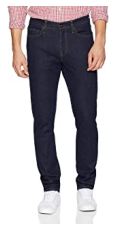

Predicted Label is: [0] 

Input Image is: img302.jpeg


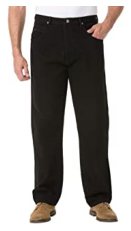

Predicted Label is: [1] 

Input Image is: img303.jpeg


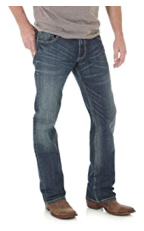

Predicted Label is: [0] 

Input Image is: img304.jpeg


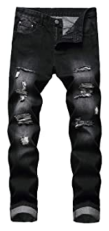

Predicted Label is: [0] 

Input Image is: img305.jpeg


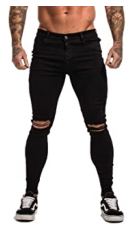

Predicted Label is: [0] 

Input Image is: img306.jpeg


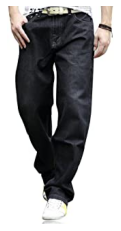

Predicted Label is: [0] 

Input Image is: img307.jpeg


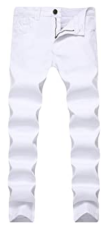

Predicted Label is: [2] 

Input Image is: img308.jpeg


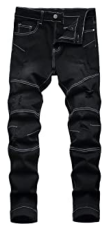

Predicted Label is: [0] 

Input Image is: img309.jpeg


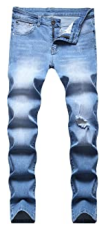

Predicted Label is: [0] 

Input Image is: img310.jpeg


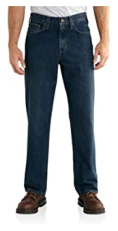

Predicted Label is: [0] 

Input Image is: img311.jpeg


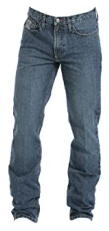

Predicted Label is: [0] 

Input Image is: img312.jpeg


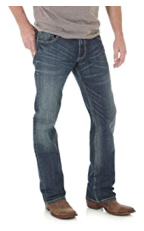

Predicted Label is: [0] 

Input Image is: img313.jpeg


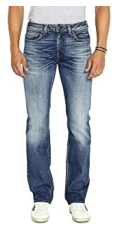

Predicted Label is: [0] 

Input Image is: img314.jpeg


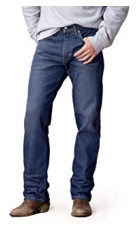

Predicted Label is: [0] 

Input Image is: img315.jpeg


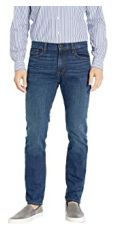

Predicted Label is: [0] 

Input Image is: img316.jpeg


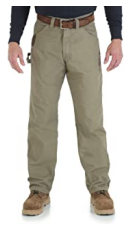

Predicted Label is: [1] 

Input Image is: img317.jpeg


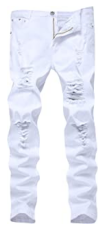

Predicted Label is: [2] 

Input Image is: img318.jpeg


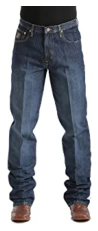

Predicted Label is: [0] 

Input Image is: img319.jpeg


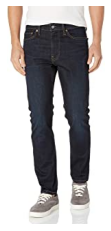

Predicted Label is: [0] 

Input Image is: img320.jpeg


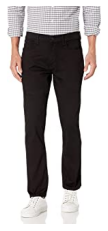

Predicted Label is: [1] 

Input Image is: img321.jpeg


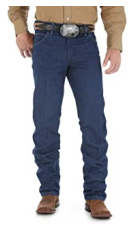

Predicted Label is: [0] 

Input Image is: img322.jpeg


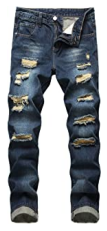

Predicted Label is: [0] 

Input Image is: img323.jpeg


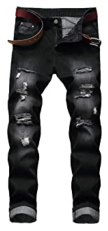

Predicted Label is: [0] 

Input Image is: img324.jpeg


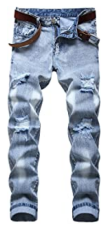

Predicted Label is: [0] 

Input Image is: img325.jpeg


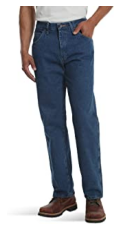

Predicted Label is: [0] 

Input Image is: img326.jpeg


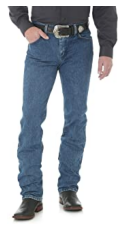

Predicted Label is: [0] 

Input Image is: img327.jpeg


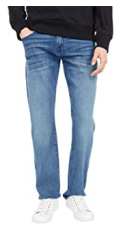

Predicted Label is: [0] 

Input Image is: img328.jpeg


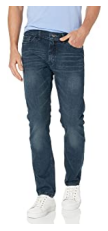

Predicted Label is: [0] 

Input Image is: img329.jpeg


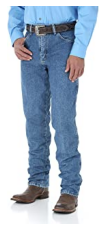

Predicted Label is: [0] 

Input Image is: img330.jpeg


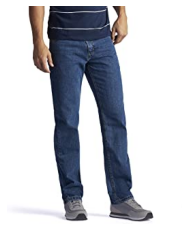

Predicted Label is: [0] 

Input Image is: img331.jpeg


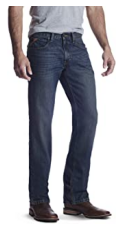

Predicted Label is: [0] 

Input Image is: img332.jpeg


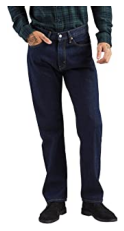

Predicted Label is: [0] 

Input Image is: img333.jpeg


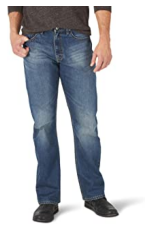

Predicted Label is: [0] 

Input Image is: img334.jpeg


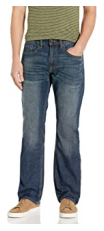

Predicted Label is: [0] 

Input Image is: img335.jpeg


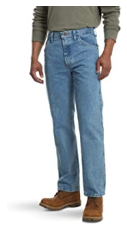

Predicted Label is: [0] 

Input Image is: img336.jpeg


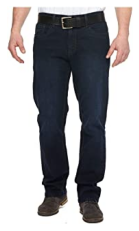

Predicted Label is: [0] 

Input Image is: img337.jpeg


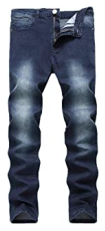

Predicted Label is: [0] 

Input Image is: img338.jpeg


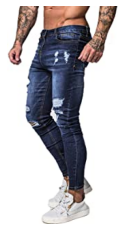

Predicted Label is: [1] 

Input Image is: img339.jpeg


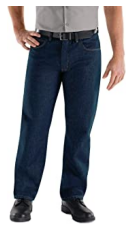

Predicted Label is: [0] 

Input Image is: img340.jpeg


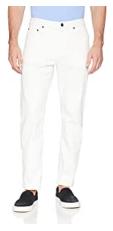

Predicted Label is: [1] 

Input Image is: img341.jpeg


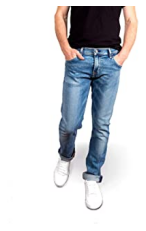

Predicted Label is: [0] 

Input Image is: img342.jpeg


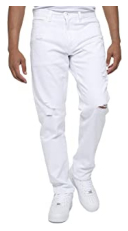

Predicted Label is: [2] 

Input Image is: img301.jpeg


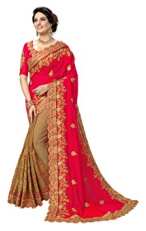

Predicted Label is: [2] 

Input Image is: img302.jpeg


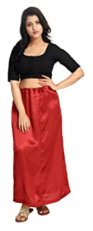

Predicted Label is: [2] 

Input Image is: img303.jpeg


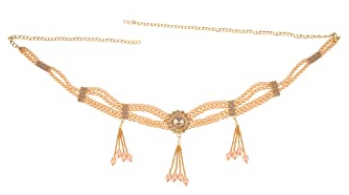

Predicted Label is: [2] 

Input Image is: img304.jpeg


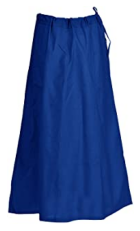

Predicted Label is: [2] 

Input Image is: img305.jpeg


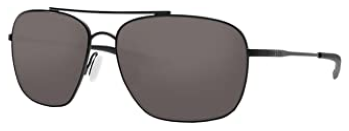

Predicted Label is: [2] 

Input Image is: img306.jpeg


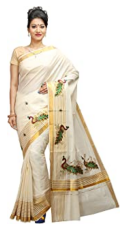

Predicted Label is: [2] 

Input Image is: img307.jpeg


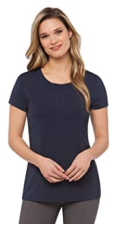

Predicted Label is: [2] 

Input Image is: img308.jpeg


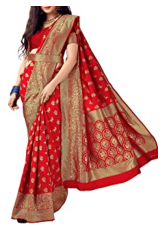

Predicted Label is: [2] 

Input Image is: img309.jpeg


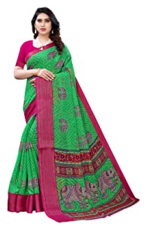

Predicted Label is: [2] 

Input Image is: img310.jpeg


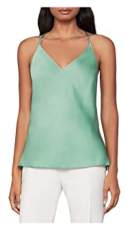

Predicted Label is: [2] 

Input Image is: img311.jpeg


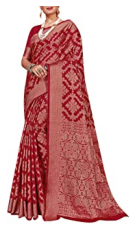

Predicted Label is: [2] 

Input Image is: img312.jpeg


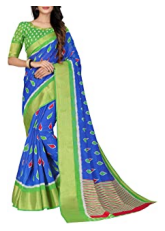

Predicted Label is: [2] 

Input Image is: img313.jpeg


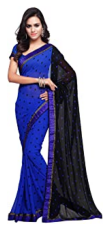

Predicted Label is: [2] 

Input Image is: img314.jpeg


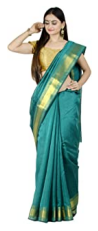

Predicted Label is: [2] 

Input Image is: img315.jpeg


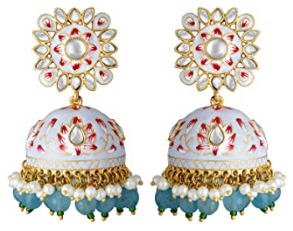

Predicted Label is: [2] 

Input Image is: img316.jpeg


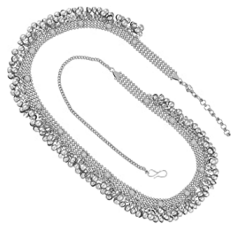

Predicted Label is: [2] 

Input Image is: img317.jpeg


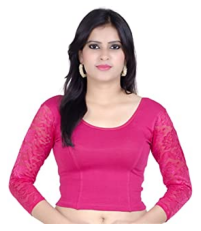

Predicted Label is: [2] 

Input Image is: img318.jpeg


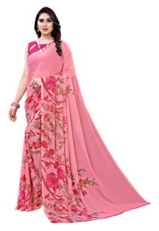

Predicted Label is: [2] 

Input Image is: img319.jpeg


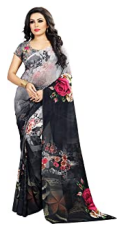

Predicted Label is: [2] 

Input Image is: img320.jpeg


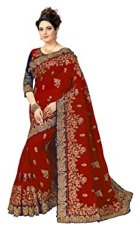

Predicted Label is: [2] 

Input Image is: img321.jpeg


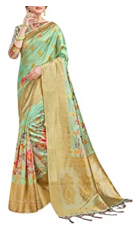

Predicted Label is: [2] 

Input Image is: img322.jpeg


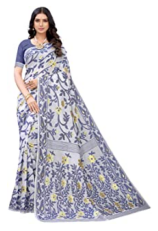

Predicted Label is: [2] 

Input Image is: img323.jpeg


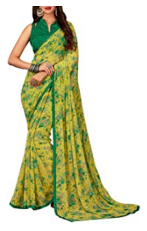

Predicted Label is: [2] 

Input Image is: img324.jpeg


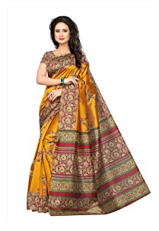

Predicted Label is: [2] 

Input Image is: img325.jpeg


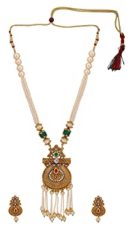

Predicted Label is: [2] 

Input Image is: img326.jpeg


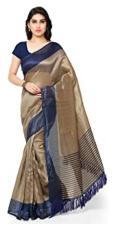

Predicted Label is: [2] 

Input Image is: img327.jpeg


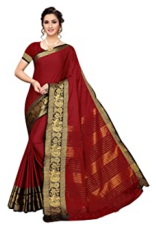

Predicted Label is: [2] 

Input Image is: img328.jpeg


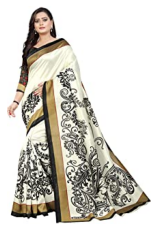

Predicted Label is: [2] 

Input Image is: img329.jpeg


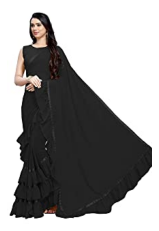

Predicted Label is: [2] 

Input Image is: img330.jpeg


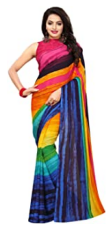

Predicted Label is: [2] 

Input Image is: img331.jpeg


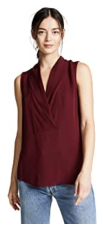

Predicted Label is: [2] 

Input Image is: img332.jpeg


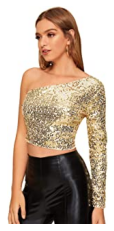

Predicted Label is: [2] 

Input Image is: img333.jpeg


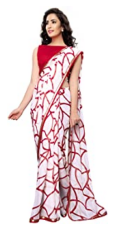

Predicted Label is: [2] 

Input Image is: img334.jpeg


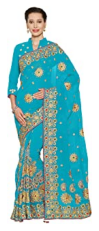

Predicted Label is: [2] 

Input Image is: img335.jpeg


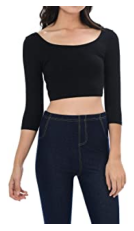

Predicted Label is: [1] 

Input Image is: img336.jpeg


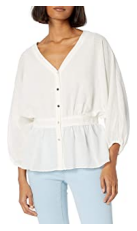

Predicted Label is: [2] 

Input Image is: img337.jpeg


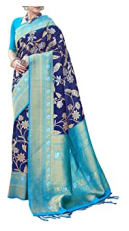

Predicted Label is: [2] 

Input Image is: img338.jpeg


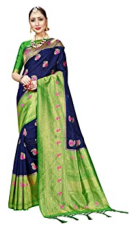

Predicted Label is: [2] 

Input Image is: img339.jpeg


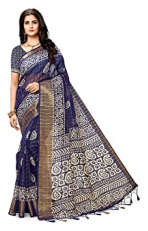

Predicted Label is: [2] 

Input Image is: img340.jpeg


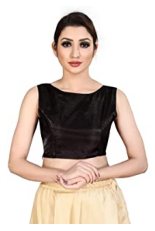

Predicted Label is: [2] 

Input Image is: img341.jpeg


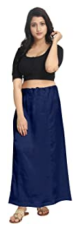

Predicted Label is: [2] 

Input Image is: img342.jpeg


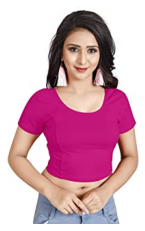

Predicted Label is: [2] 

Input Image is: img301.jpeg


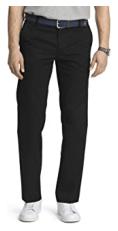

Predicted Label is: [0] 

Input Image is: img302.jpeg


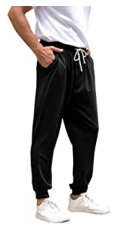

Predicted Label is: [1] 

Input Image is: img303.jpeg


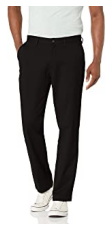

Predicted Label is: [1] 

Input Image is: img304.jpeg


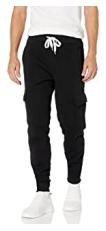

Predicted Label is: [1] 

Input Image is: img305.jpeg


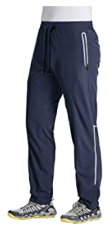

Predicted Label is: [1] 

Input Image is: img306.jpeg


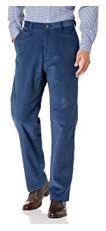

Predicted Label is: [0] 

Input Image is: img307.jpeg


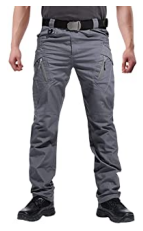

Predicted Label is: [0] 

Input Image is: img308.jpeg


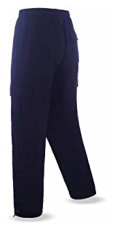

Predicted Label is: [1] 

Input Image is: img309.jpeg


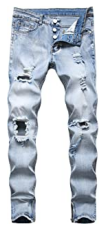

Predicted Label is: [0] 

Input Image is: img310.jpeg


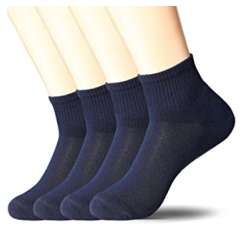

Predicted Label is: [2] 

Input Image is: img311.jpeg


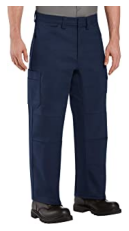

Predicted Label is: [1] 

Input Image is: img312.jpeg


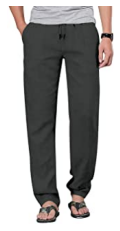

Predicted Label is: [0] 

Input Image is: img313.jpeg


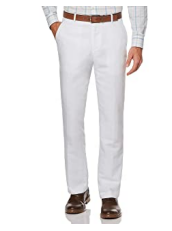

Predicted Label is: [2] 

Input Image is: img314.jpeg


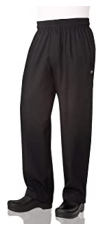

Predicted Label is: [1] 

Input Image is: img315.jpeg


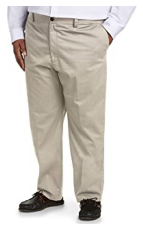

Predicted Label is: [1] 

Input Image is: img316.jpeg


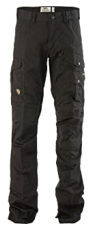

Predicted Label is: [0] 

Input Image is: img317.jpeg


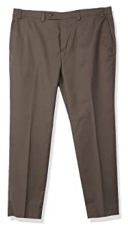

Predicted Label is: [1] 

Input Image is: img318.jpeg


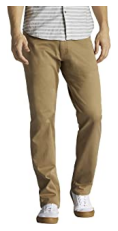

Predicted Label is: [1] 

Input Image is: img319.jpeg


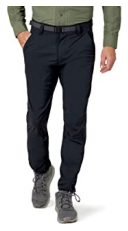

Predicted Label is: [0] 

Input Image is: img320.jpeg


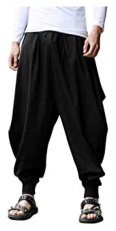

Predicted Label is: [1] 

Input Image is: img321.jpeg


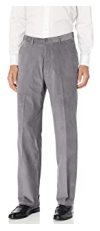

Predicted Label is: [1] 

Input Image is: img322.jpeg


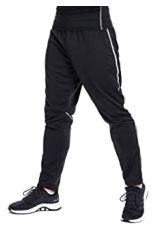

Predicted Label is: [1] 

Input Image is: img323.jpeg


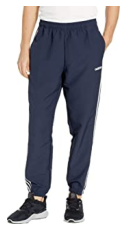

Predicted Label is: [1] 

Input Image is: img324.jpeg


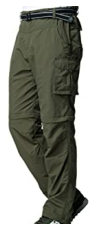

Predicted Label is: [1] 

Input Image is: img325.jpeg


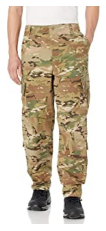

Predicted Label is: [1] 

Input Image is: img326.jpeg


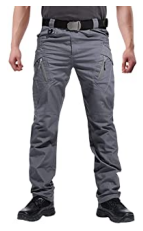

Predicted Label is: [0] 

Input Image is: img327.jpeg


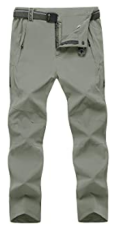

Predicted Label is: [1] 

Input Image is: img328.jpeg


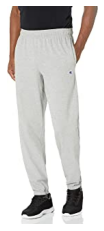

Predicted Label is: [1] 

Input Image is: img329.jpeg


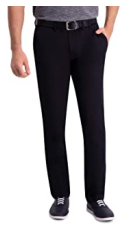

Predicted Label is: [0] 

Input Image is: img330.jpeg


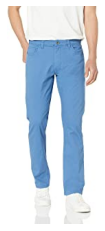

Predicted Label is: [0] 

Input Image is: img331.jpeg


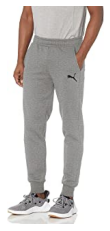

Predicted Label is: [1] 

Input Image is: img332.jpeg


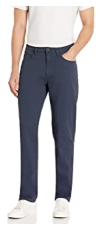

Predicted Label is: [1] 

Input Image is: img333.jpeg


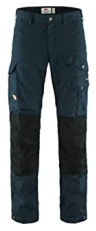

Predicted Label is: [0] 

Input Image is: img334.jpeg


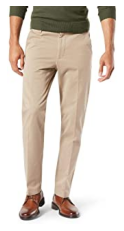

Predicted Label is: [1] 

Input Image is: img335.jpeg


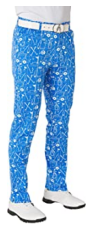

Predicted Label is: [0] 

Input Image is: img336.jpeg


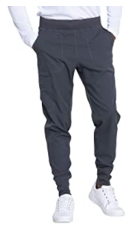

Predicted Label is: [0] 

Input Image is: img337.jpeg


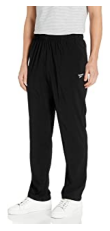

Predicted Label is: [1] 

Input Image is: img338.jpeg


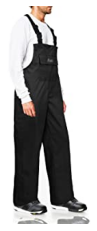

Predicted Label is: [2] 

Input Image is: img339.jpeg


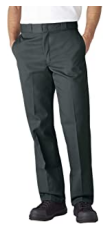

Predicted Label is: [1] 

Input Image is: img340.jpeg


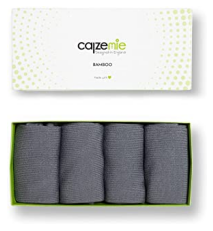

Predicted Label is: [2] 

Input Image is: img341.jpeg


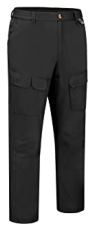

Predicted Label is: [1] 

Input Image is: img342.jpeg


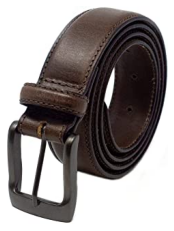

Predicted Label is: [1] 



In [64]:
test_dire=[test_jeans,test_saree,test_trouser]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")